In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


raw = "C:/Users/39392/Downloads/CarsDatasets2025.csv"
df = pd.read_csv(raw,encoding= "latin-1")

df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [204]:
df["Fuel Types"].unique()
conteggi = df['Fuel Types'].value_counts()

print(conteggi)
print("...........................")

df["Company Names"] = (
    df["Company Names"]
    .astype(str)
    .str.strip()
    .str.title()
)

def normalize_brand(name):
    name = str(name).strip().lower()
    name = re.sub(r"\s+", " ", name)

    if name in ["bmw", "gmc"]:
        return name.upper()

    if "rolls" in name:
        return "Rolls-Royce"

    if "mercedes" in name:
        return "Mercedes-Benz"
    
    return name.title()

def simplify_fuel_type(x):
    x = str(x).lower()
    if "petrol" in x and "diesel" in x:
        return "Petrol/Diesel"
    elif "petrol" in x and "hybrid" in x:
        return "Petrol/Hybrid"
    elif "diesel" in x and "hybrid" in x:
        return "Diesel Hybrid"
    elif "hybrid" in x:
        return "Hybrid"
    elif "electric" in x or "ev" in x:
        return "Electric"
    elif "hydrogen" in x:
        return "Hydrogen"
    elif "cng" in x:
        return "CNG"
    elif "petrol" in x:
        return "Petrol"
    elif "diesel" in x:
        return "Diesel"
    else:
        return "Other"

df["Fuel Types Grouped"] = df["Fuel Types"].apply(simplify_fuel_type)

df["Company Names"] = df["Company Names"].apply(normalize_brand)
df.groupby("Fuel Types Grouped").count()

print(df["Fuel Types Grouped"].value_counts())
print(sorted(df["Company Names"].unique()))


Fuel Types
Petrol                     871
Diesel                     106
Electric                    97
Hybrid                      79
Petrol/Diesel               16
Petrol/Hybrid               16
Plug-in Hybrid               5
Hybrid (Petrol)              4
Diesel/Petrol                4
Petrol, Diesel               3
Hydrogen                     3
Petrol, Hybrid               2
Petrol/AWD                   2
plug in hyrbrid              1
Hybrid/Electric              1
Petrol/EV                    1
CNG/Petrol                   1
Hybrid/Petrol                1
Diesel Hybrid                1
Petrol (Hybrid)              1
Hybrid (Gas + Electric)      1
Gas / Hybrid                 1
Hybrid / Plug-in             1
Name: count, dtype: int64
...........................
Fuel Types Grouped
Petrol           873
Diesel           106
Electric          98
Hybrid            88
Petrol/Hybrid     24
Petrol/Diesel     23
Hydrogen           3
Other              1
CNG                1
Diesel Hybrid 

In [205]:
df.nunique()

Company Names                  31
Cars Names                   1201
Engines                       356
CC/Battery Capacity           311
HorsePower                    456
Total Speed                   114
Performance(0 - 100 )KM/H     180
Cars Prices                   535
Fuel Types                     23
Seats                          19
Torque                        263
Fuel Types Grouped             10
dtype: int64

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          5
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  1
Fuel Types                   0
Seats                        0
Torque                       1
Fuel Types Grouped           0
dtype: int64


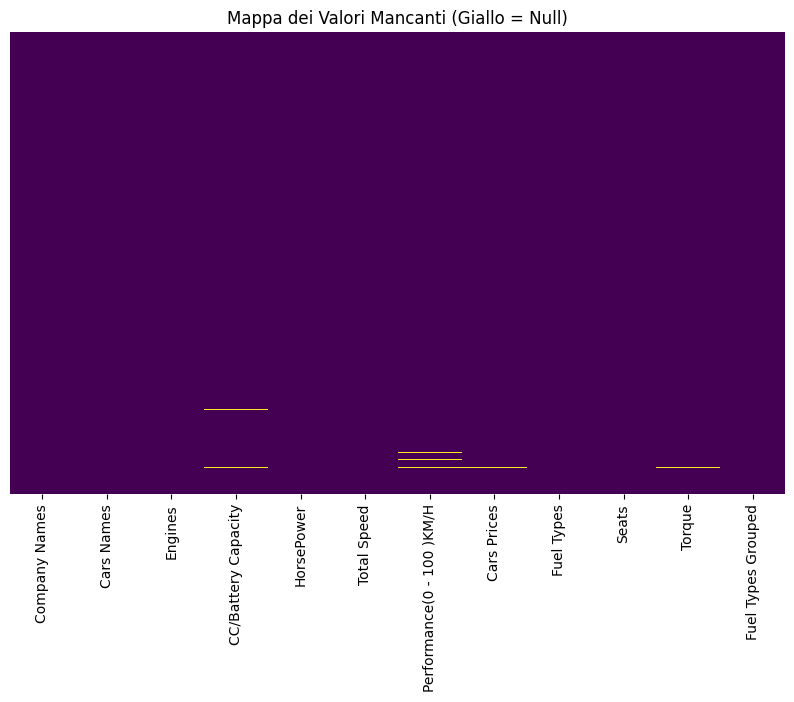

In [206]:
def extract_numeric(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.findall(r"[-+]?\d*\.?\d+", s)
    if not m:
        return np.nan
    return float(m[0])

numeric_cols_raw = [
    "CC/Battery Capacity",
    "HorsePower",
    "Total Speed",
    "Performance(0 - 100 )KM/H",
    "Cars Prices",
    "Torque",
    "Seats"
]

for col in numeric_cols_raw:
    if col in df.columns:
        df[col] = df[col].apply(extract_numeric)


null_counts = df.isnull().sum()
print(null_counts)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mappa dei Valori Mancanti (Giallo = Null)')
plt.show()

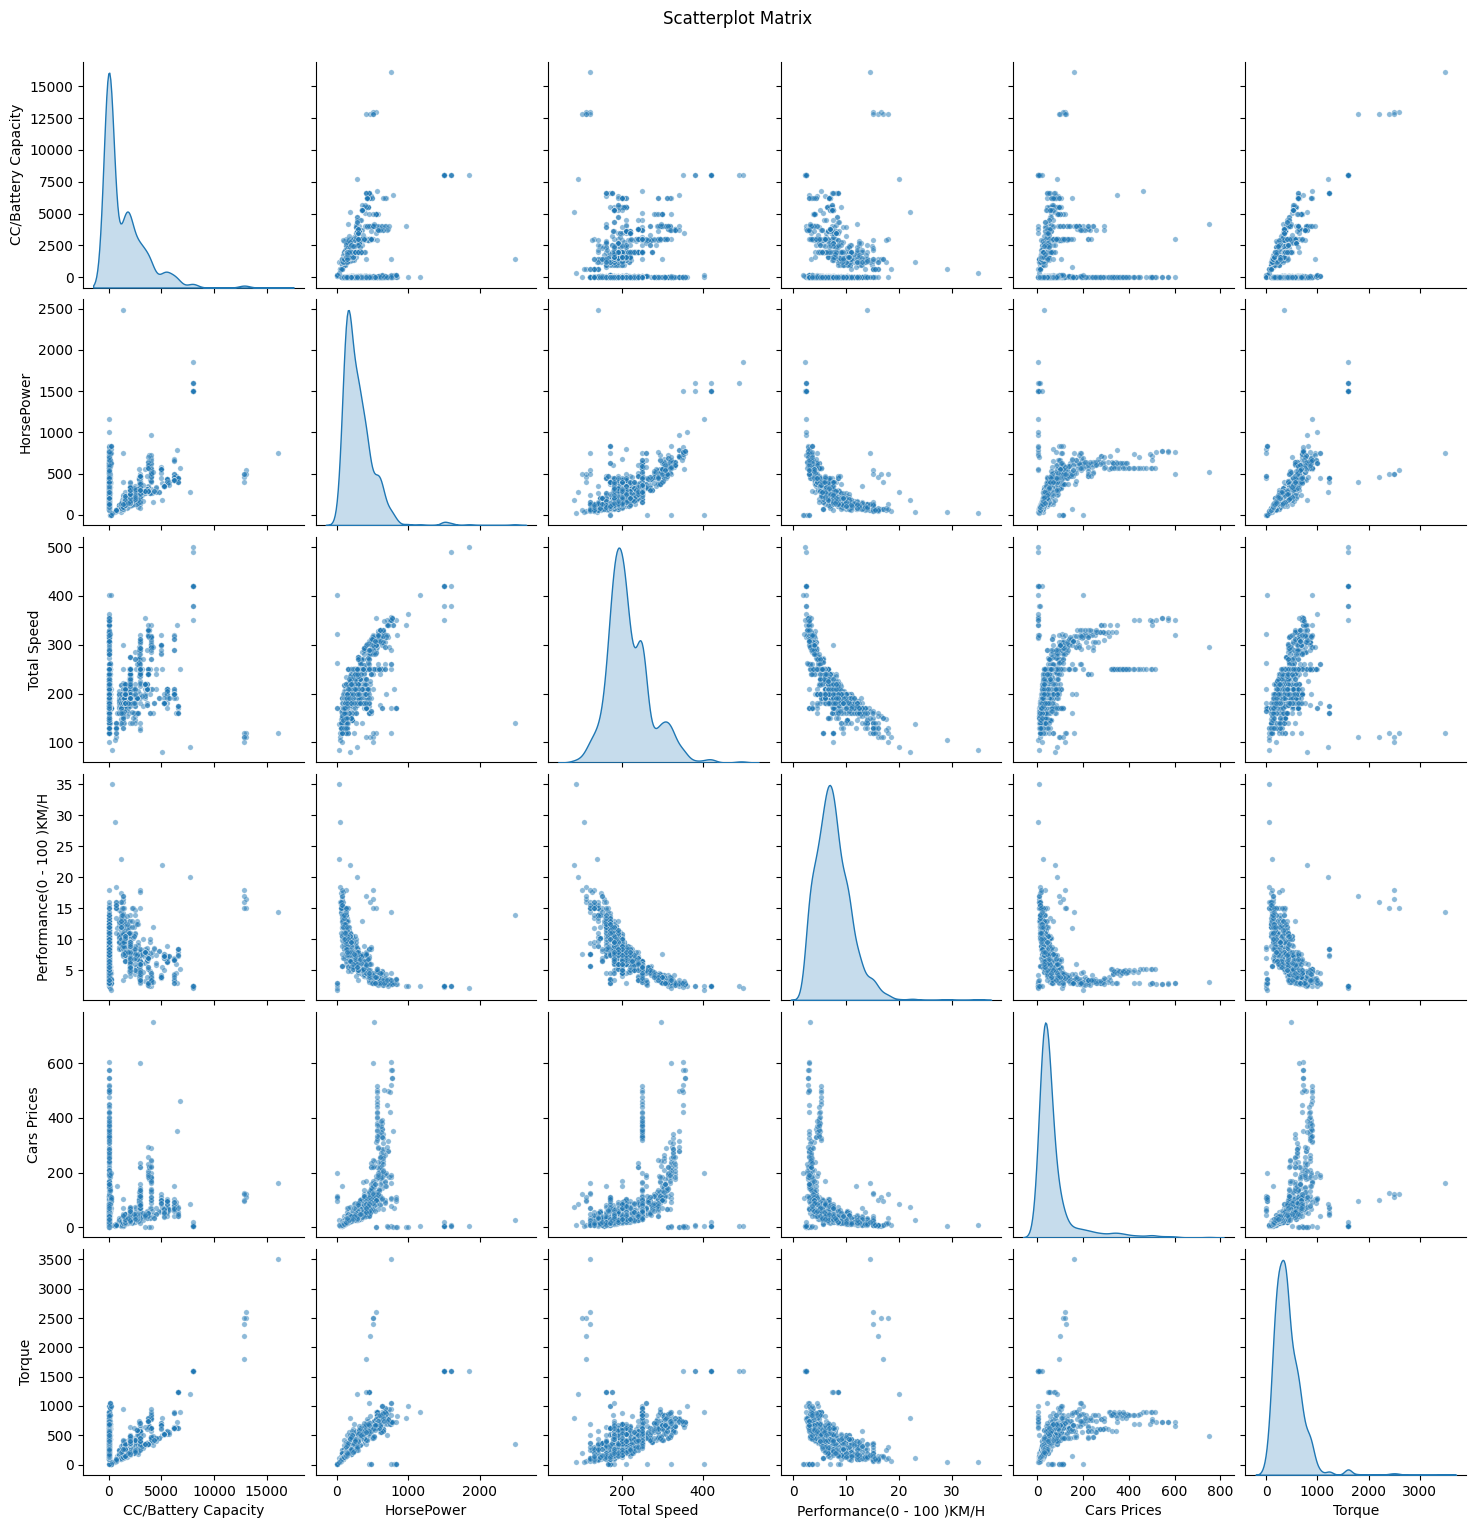

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1218 non-null   float64
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1218 non-null   float64
 7   Cars Prices                1218 non-null   float64
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   float64
 10  Torque                     1218 non-null   float64
 11  Fuel Types Grouped         1218 non-null   object 
dtypes: float64(7), object(5)
memory usage: 114.3+ KB


In [207]:

numeric_cols = df.select_dtypes(include=["float", "int"]).columns.tolist()

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df = df.dropna(subset=["CC/Battery Capacity", "Performance(0 - 100 )KM/H", "Torque"])

cols_to_plot = [
    "CC/Battery Capacity",
    "HorsePower",
    "Total Speed",
    "Performance(0 - 100 )KM/H",
    "Cars Prices",
    "Torque"
]

g = sns.pairplot(
    df[cols_to_plot],
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 's': 15},
    diag_kws={'fill': True},
    height=2.5
)

g.figure.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

# 6. Info finale
df.info()


In [208]:

print(df["Cars Prices"].mean())
print(df["Cars Prices"].median())

print(df.mean(numeric_only=True))
print("MEDIANA")
print(df.median(numeric_only=True))


68.82908792111749
40.0
CC/Battery Capacity          1413.553009
HorsePower                    300.397373
Total Speed                   216.467159
Performance(0 - 100 )KM/H       7.563614
Cars Prices                    68.829088
Seats                           4.833333
Torque                        425.949877
dtype: float64
MEDIANA
CC/Battery Capacity           87.0
HorsePower                   250.0
Total Speed                  200.0
Performance(0 - 100 )KM/H      7.1
Cars Prices                   40.0
Seats                          5.0
Torque                       366.0
dtype: float64


In [209]:
print(df.info())

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1218 non-null   float64
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1218 non-null   float64
 7   Cars Prices                1218 non-null   float64
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   float64
 10  Torque                     1218 non-null   float64
 11  Fuel Types Grouped         1218 non-null   object 
dtypes: float64(7), object(5)
memory usage: 114.3+ KB
None
      Company Names         Cars Names            

In [210]:
df.describe()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,1413.553009,300.397373,216.467159,7.563614,68.829088,4.833333,425.949877
std,2019.141757,219.343342,53.051077,3.301844,88.798214,1.521462,290.496902
min,1.000000,1.000000,80.000000,1.900000,1.000000,1.000000,1.000000
25%,2.000000,150.000000,180.000000,5.300000,26.000000,4.000000,250.000000
50%,87.000000,250.000000,200.000000,7.100000,40.000000,5.000000,366.000000
75%,2000.000000,400.000000,250.000000,9.500000,68.000000,5.000000,559.750000
max,16100.000000,2488.000000,500.000000,35.000000,750.000000,20.000000,3500.000000


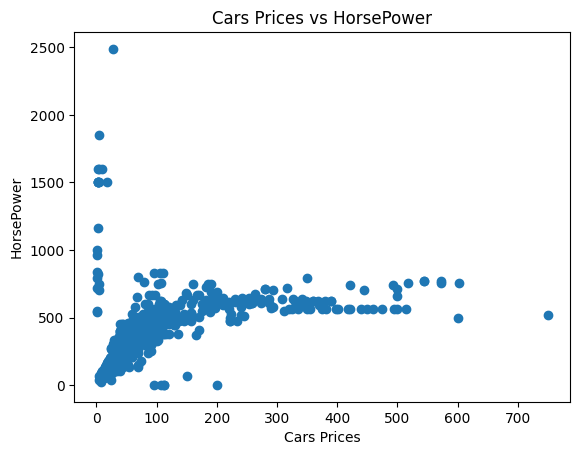

In [211]:
plt.figure()
plt.scatter(df["Cars Prices"], df["HorsePower"])
plt.xlabel("Cars Prices")
plt.ylabel("HorsePower")
plt.title("Cars Prices vs HorsePower")
plt.show()             

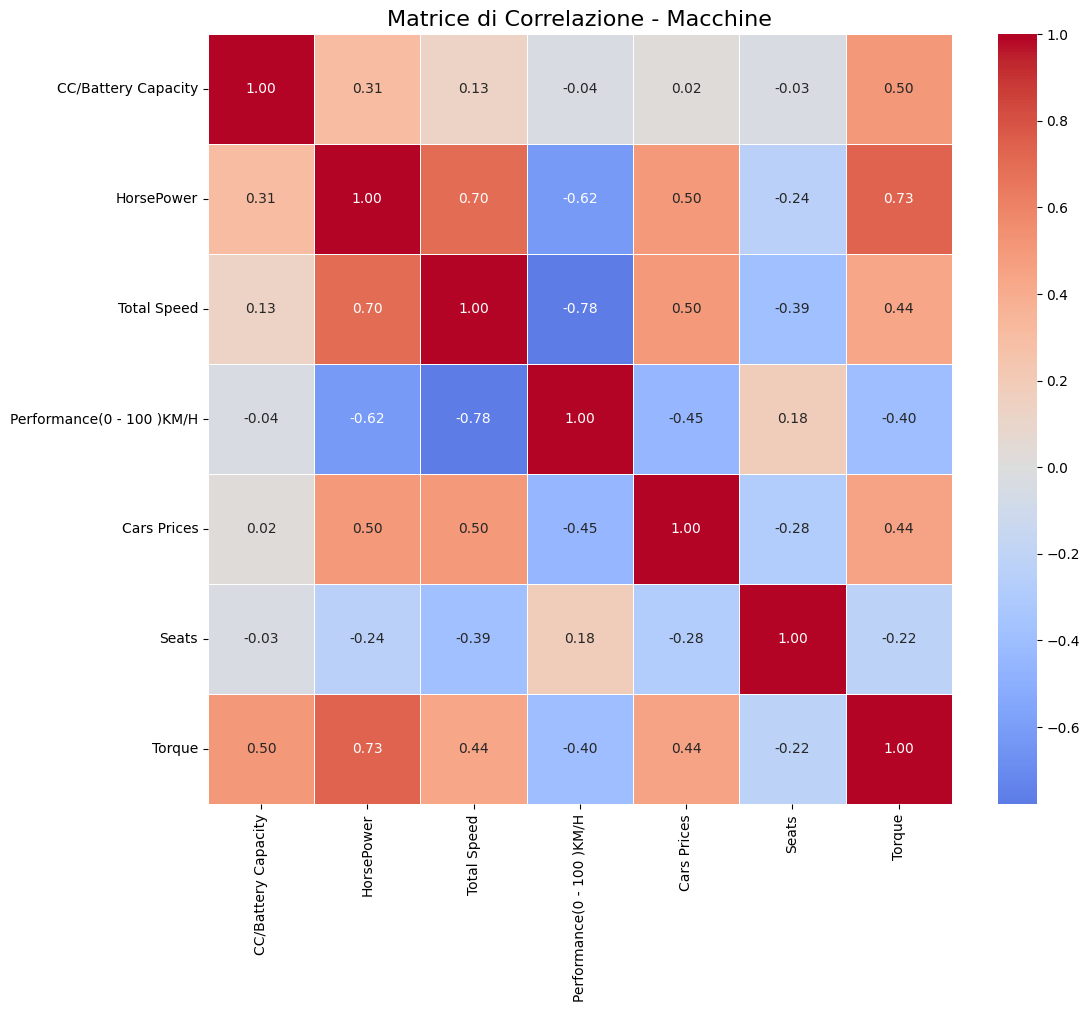

In [212]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white',
    fmt=".2f"
)

plt.title('Matrice di Correlazione - Macchine', fontsize=16)
plt.show()



OUTLIERS COUNT:
CC/Battery Capacity 92
HorsePower 22
Total Speed 13
Performance(0 - 100 )KM/H 23
Cars Prices 129
Seats 331
Torque 26

Shape after outlier removal: (619, 12)

CORRELATION WITHOUT OUTLIERS:
                            CC/Battery Capacity  HorsePower  Total Speed  \
CC/Battery Capacity                   1.000000    0.111612     0.217912   
HorsePower                            0.111612    1.000000     0.597178   
Total Speed                           0.217912    0.597178     1.000000   
Performance(0 - 100 )KM/H            -0.074615   -0.781924    -0.712094   
Cars Prices                           0.171672    0.802187     0.607088   
Seats                                      NaN         NaN          NaN   
Torque                                0.088160    0.863762     0.530629   

                           Performance(0 - 100 )KM/H  Cars Prices  Seats  \
CC/Battery Capacity                        -0.074615     0.171672    NaN   
HorsePower                               

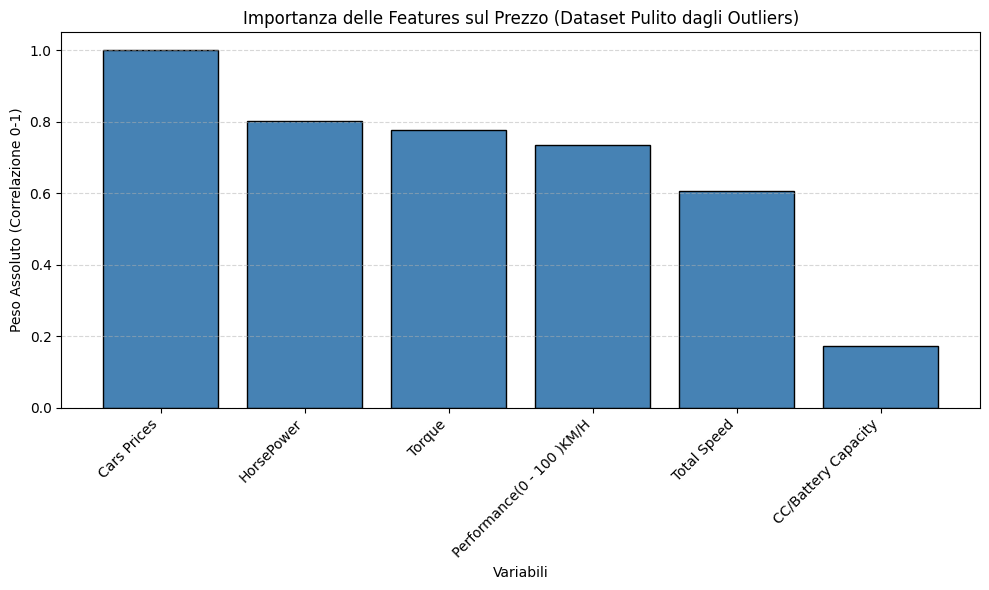

In [213]:
def find_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] < low) | (df[col] > high)]

print("\nOUTLIERS COUNT:")
for col in numeric_cols:
    print(col, len(find_outliers(col)))

df_no_out = df.copy()
for col in numeric_cols:
    Q1 = df_no_out[col].quantile(0.25)
    Q3 = df_no_out[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df_no_out = df_no_out[(df_no_out[col] >= low) & (df_no_out[col] <= high)]

print("\nShape after outlier removal:", df_no_out.shape)

corr_no_out = df_no_out[numeric_cols].corr()
corr_price = df_no_out[numeric_cols].corr()["Cars Prices"].abs().sort_values(ascending=False)
print("\nCORRELATION WITHOUT OUTLIERS:\n", corr_no_out)

plt.figure(figsize=(10, 6))
plt.bar(corr_price.index, corr_price.values, color='steelblue', edgecolor='black')

plt.title('Importanza delle Features sul Prezzo (Dataset Pulito dagli Outliers)')
plt.ylabel('Peso Assoluto (Correlazione 0-1)')
plt.xlabel('Variabili')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [214]:
df_eng = df.copy()

# Pulizia prezzi se necessario
df_eng['Cars Prices'] = pd.to_numeric(df_eng['Cars Prices'], errors='coerce')

# Creazione colonne
df_eng['Price_seats'] = df_eng['Cars Prices'] / df_eng['Seats']
df_eng['Torque_velocità'] = df_eng['Torque'] / df_eng['Total Speed']


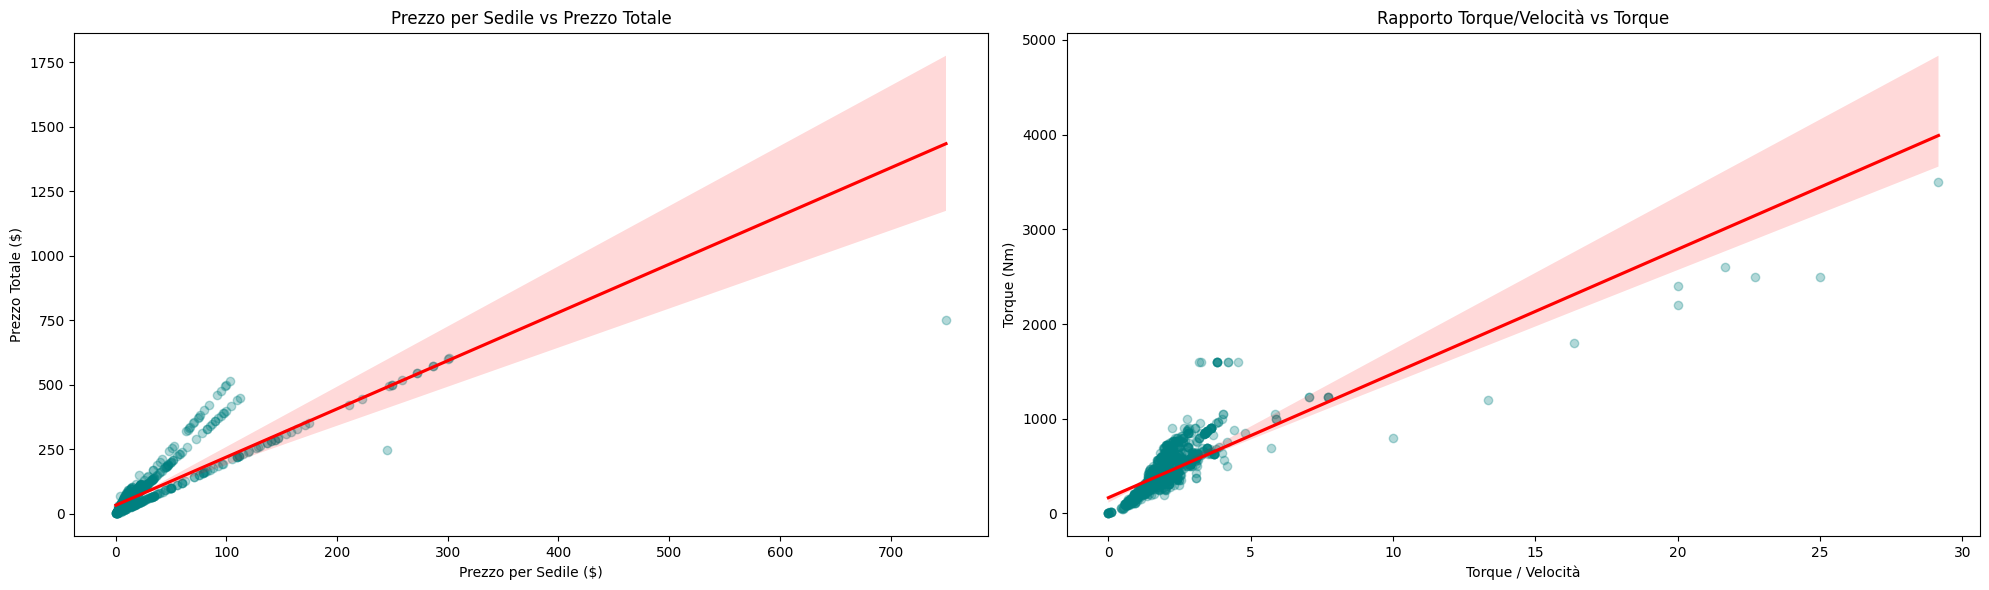

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Prezzo per sedile vs prezzo totale
sns.regplot(x='Price_seats', y='Cars Prices', data=df_eng, ax=axes[0],
            scatter_kws={'alpha':0.3, 'color':'teal'},
            line_kws={'color':'red'})
axes[0].set_title('Prezzo per Sedile vs Prezzo Totale')
axes[0].set_xlabel('Prezzo per Sedile ($)')
axes[0].set_ylabel('Prezzo Totale ($)')

# Torque/velocità vs torque
sns.regplot(x='Torque_velocità', y='Torque', data=df_eng, ax=axes[1],
            scatter_kws={'alpha':0.3, 'color':'teal'},
            line_kws={'color':'red'})
axes[1].set_title('Rapporto Torque/Velocità vs Torque')
axes[1].set_xlabel('Torque / Velocità')
axes[1].set_ylabel('Torque (Nm)')

plt.tight_layout()
plt.show()


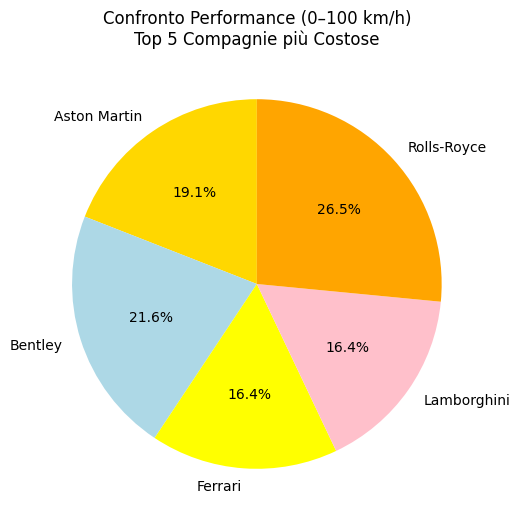

In [216]:
topB = (
    df.groupby("Company Names")["Cars Prices"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
      .index
      .tolist()
)

df_topB = df[df["Company Names"].isin(topB)]

performance_by_brand = (
    df_topB.groupby("Company Names")["Performance(0 - 100 )KM/H"]
           .mean()
)

plt.figure(figsize=(6,6))
plt.pie(
    performance_by_brand,
    labels=performance_by_brand.index,
    autopct='%1.1f%%',
    colors=['gold', 'lightblue','yellow','pink','orange'],
    startangle=90
)
plt.title('Confronto Performance (0–100 km/h)\nTop 5 Compagnie più Costose')
plt.show()


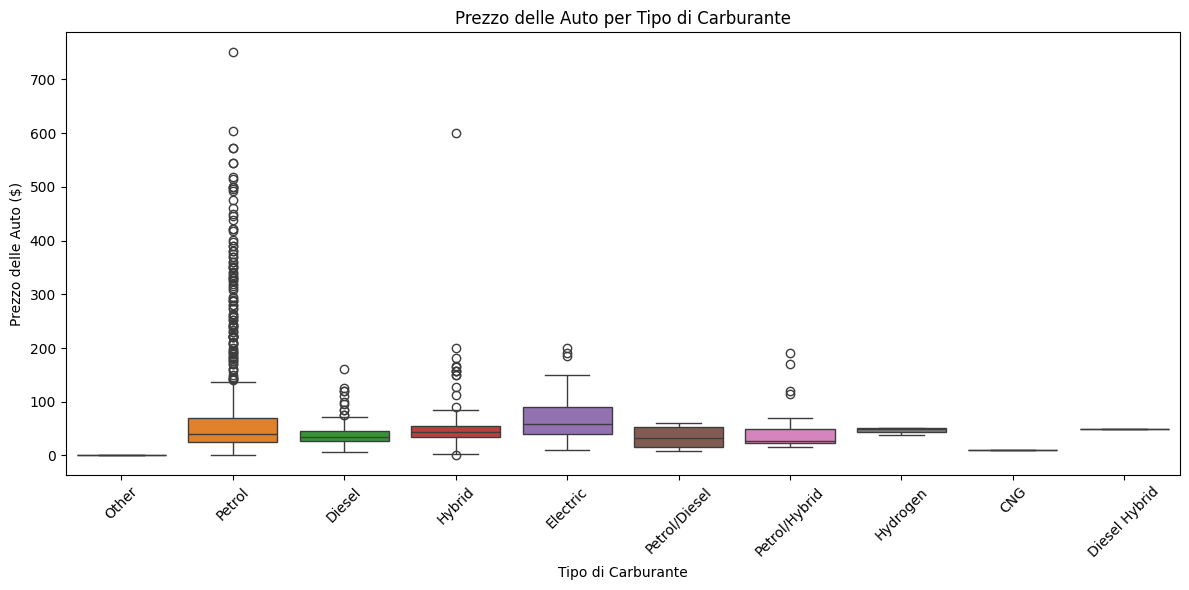

In [217]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x='Fuel Types Grouped',
    y='Cars Prices',
    hue = "Fuel Types Grouped",

)

plt.title('Prezzo delle Auto per Tipo di Carburante')
plt.xlabel('Tipo di Carburante')
plt.ylabel('Prezzo delle Auto ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


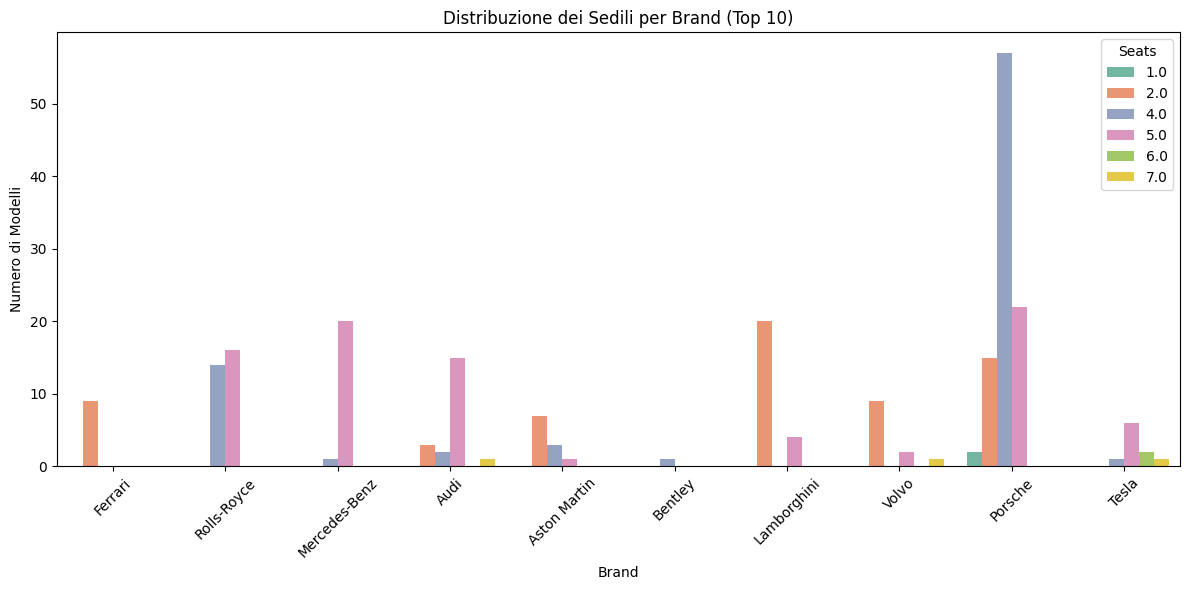

In [218]:

topBb = (
    df.groupby("Company Names")["Cars Prices"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
      .tolist()
)
df_top10 = df[df['Company Names'].isin(topBb)]

# Calcolo mediana sedili per brand
seats_median = (
    df_top10.groupby('Company Names')['Seats']
    .median()
    .sort_values()
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_top10,
    x='Company Names',
    hue='Seats',
    palette='Set2'
)

plt.title('Distribuzione dei Sedili per Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Numero di Modelli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\39392\AppData\Local\Temp\ipykernel_23652\2956754383.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


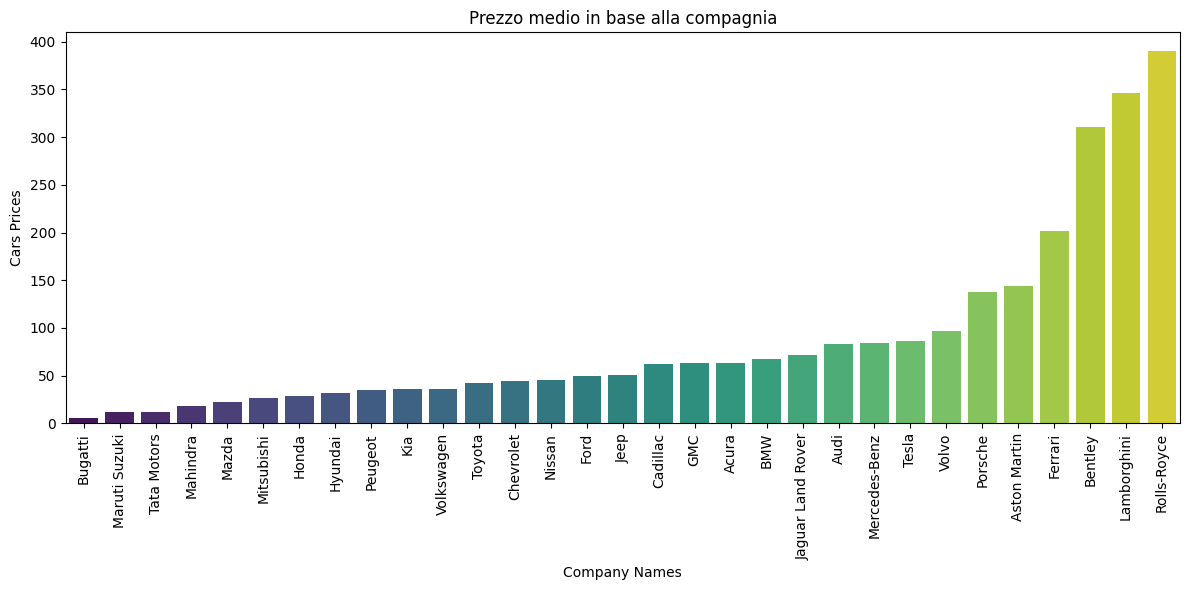

In [219]:

cars_stats = df_eng.groupby('Company Names')[['Cars Prices']].mean()

cars_stats = cars_stats.sort_values('Cars Prices', ascending=True)

plt.figure(figsize=(12, 6))
plt.title('Prezzo medio in base alla compagnia')

sns.barplot(
    x=cars_stats.index,
    y=cars_stats['Cars Prices'],
    palette='viridis'
)

plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


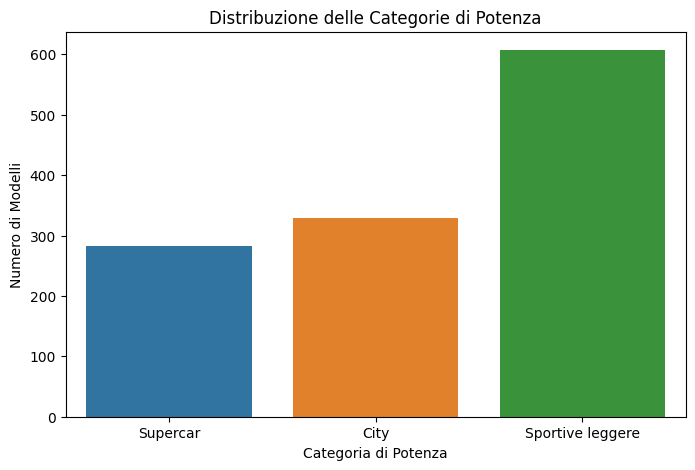

In [220]:
def categorize_hp(hp):
    if hp <= 150:
        return "City"
    elif hp <= 400:
        return "Sportive leggere"
    else:
        return "Supercar"

df['HP_Category'] = df['HorsePower'].apply(categorize_hp)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='HP_Category', hue='HP_Category')
plt.title('Distribuzione delle Categorie di Potenza')
plt.xlabel('Categoria di Potenza')
plt.ylabel('Numero di Modelli')
plt.show()



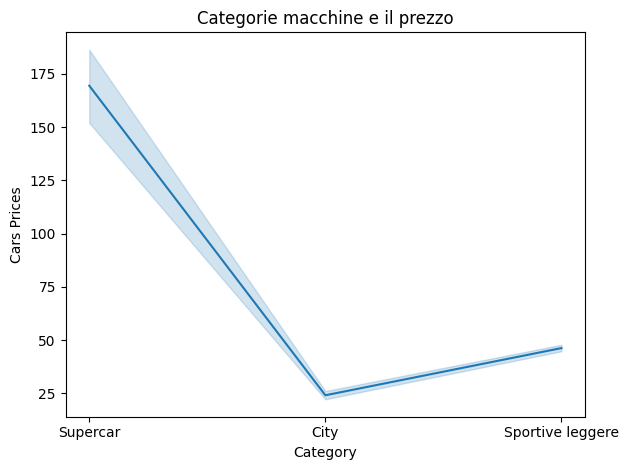

In [221]:
df["Category"] = df["HorsePower"].apply(categorize_hp)

plt.title('Categorie macchine e il prezzo')
sns.lineplot(data=df, x = "Category", y="Cars Prices")
plt.tight_layout()
plt.show()

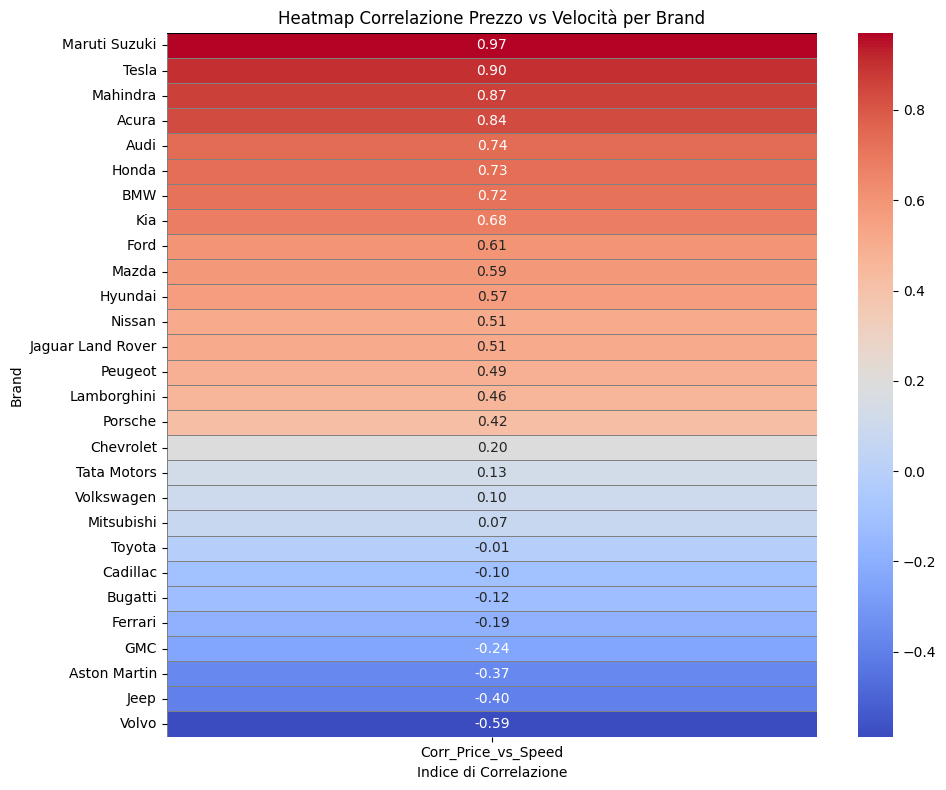

In [ ]:
correlations = {}
for brand in df['Company Names'].unique():
    subset = df[df['Company Names'] == brand]
    if subset['Cars Prices'].nunique() > 1 and subset['Total Speed'].nunique() > 1:
        corr = subset['Cars Prices'].corr(subset['Total Speed'])
        correlations[brand] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Corr_Price_vs_Speed'])
corr_df = corr_df.sort_values('Corr_Price_vs_Speed', ascending=False)

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_df[['Corr_Price_vs_Speed']],
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Heatmap Correlazione Prezzo vs Velocità per Brand')
plt.ylabel('Brand')
plt.xlabel('Indice di Correlazione')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()
